In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_2.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
DS={}
for ds_index in range(1,8):
    DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],data[data["class"]=="human"].sample(60364)])
    DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(DS["DS"+str(ds_index)].drop(['class'],axis=1), DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:

classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])



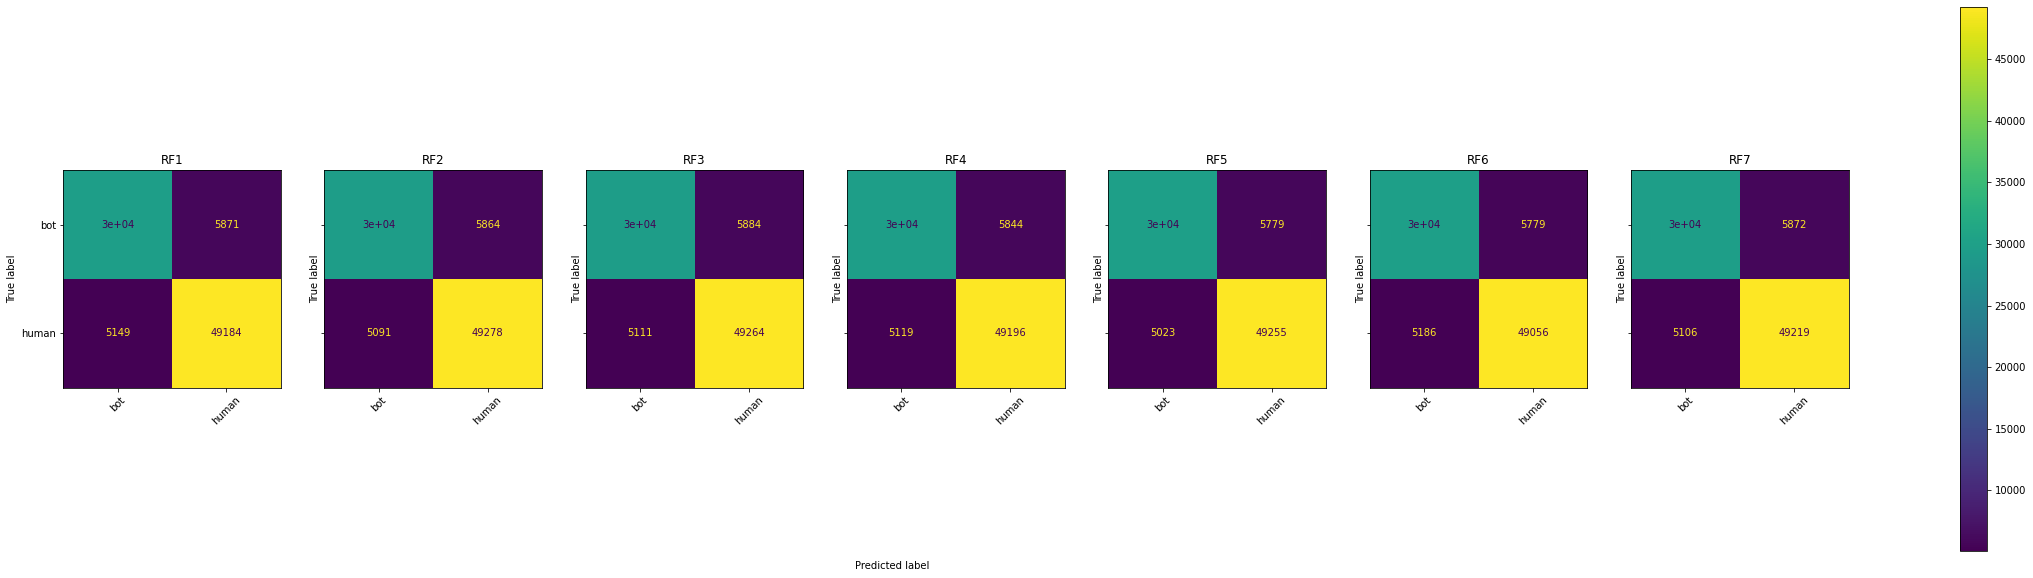

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.852654,0.835394,0.843936,35667,0.893361,0.905233,0.899258,54333,0.877556
1,RF2,0.853950,0.835424,0.844586,35631,0.893656,0.906362,0.899964,54369,0.878278
2,RF3,0.853351,0.834835,0.843992,35625,0.893305,0.906005,0.899610,54375,0.877833
3,RF4,0.853576,0.836234,0.844816,35685,0.893823,0.905753,0.899749,54315,0.878189
4,RF5,0.856346,0.838223,0.847188,35722,0.894992,0.907458,0.901182,54278,0.879978
5,RF6,0.852524,0.838386,0.845396,35758,0.894611,0.904391,0.899475,54242,0.878167
6,RF7,0.853734,0.835403,0.844469,35675,0.893413,0.906010,0.899667,54325,0.878022


In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["train"+str(i+1)], y_predict["train"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

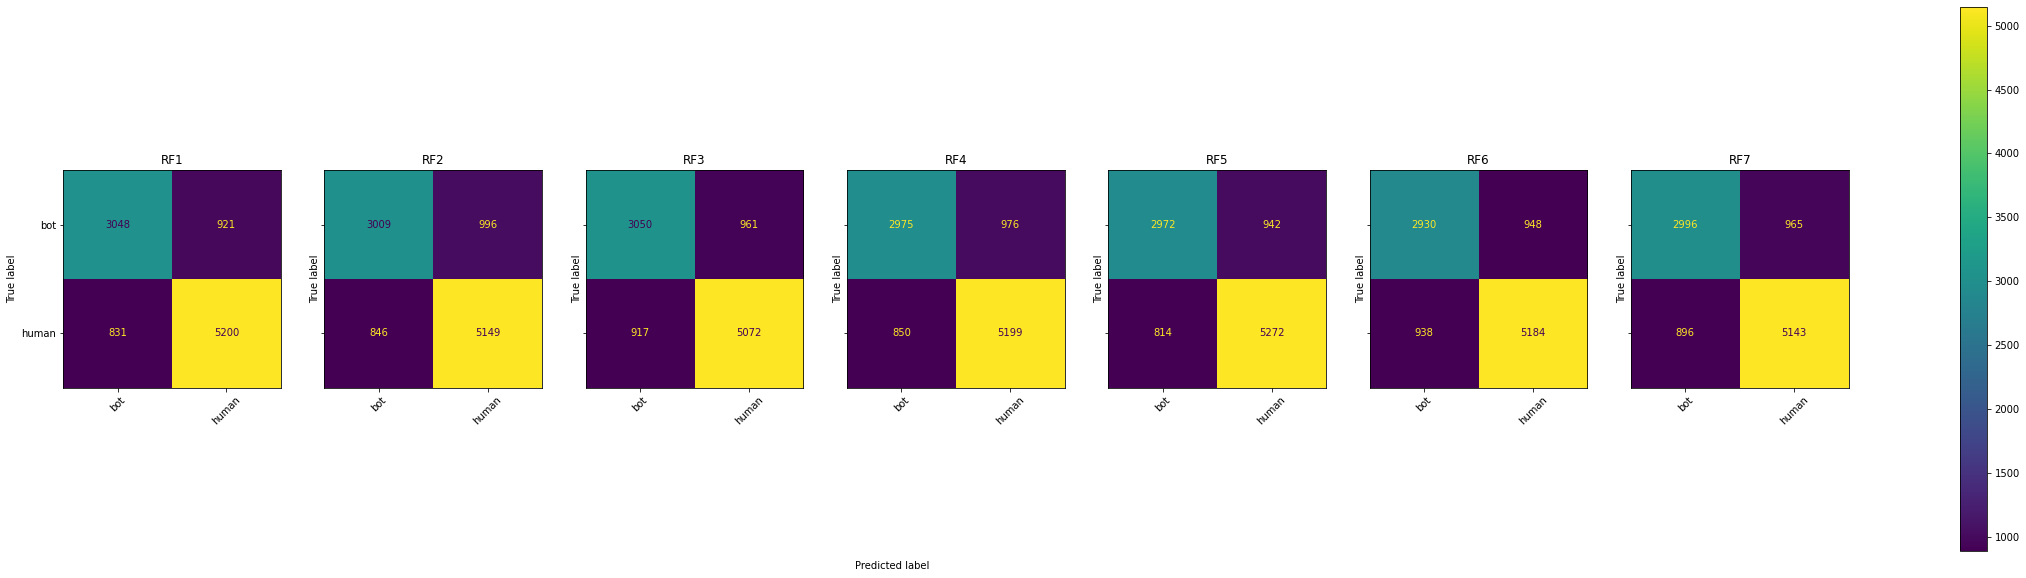

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.785770,0.767952,0.776758,3969,0.849534,0.862212,0.855826,6031,0.8248
1,RF2,0.780545,0.751311,0.765649,4005,0.837917,0.858882,0.848270,5995,0.8158
2,RF3,0.768843,0.760409,0.764603,4011,0.840709,0.846886,0.843786,5989,0.8122
3,RF4,0.777778,0.752974,0.765175,3951,0.841943,0.859481,0.850622,6049,0.8174
4,RF5,0.784997,0.759325,0.771948,3914,0.848407,0.866250,0.857236,6086,0.8244
5,RF6,0.757497,0.755544,0.756519,3878,0.845401,0.846782,0.846091,6122,0.8114
6,RF7,0.769784,0.756375,0.763021,3961,0.842010,0.851631,0.846793,6039,0.8139


In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test"+str(i+1)])
    cf_matrix = confusion_matrix(y["test"+str(i+1)], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["test"+str(i+1)], y_predict["test"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_new_predict={}
  for i, (key, clas_f) in enumerate(classifer.items()):
    y_new_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(test.drop(['class'],axis=1))
  output_prediction=list()
  for index_2,value in enumerate(y_new_predict["test1"]):
    if [y_new_predict["test1"][index_2],y_new_predict["test2"][index_2],y_new_predict["test3"][index_2],y_new_predict["test4"][index_2],y_new_predict["test5"][index_2],y_new_predict["test6"][index_2],y_new_predict["test7"][index_2]].count("bot")>3:
      output_prediction.append("bot")
    else:
      output_prediction.append("human")
  output_prediction = np.array(output_prediction)

  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], output_prediction,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], output_prediction)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)